In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.shape

(414, 9)

In [4]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:title={'center':'distribution plot'}, xlabel='Number of bedrooms', ylabel='count'>

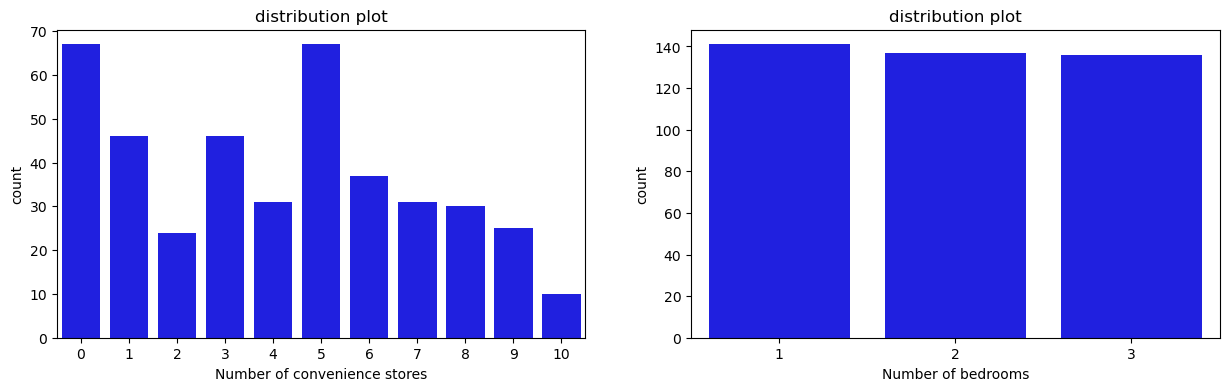

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.countplot(df['Number of convenience stores'],color='blue')
plt.subplot(1,2,2)
plt.title('distribution plot')
sns.countplot(df['Number of bedrooms'],color='blue')

#Countplot for No. of Store and Room in House.

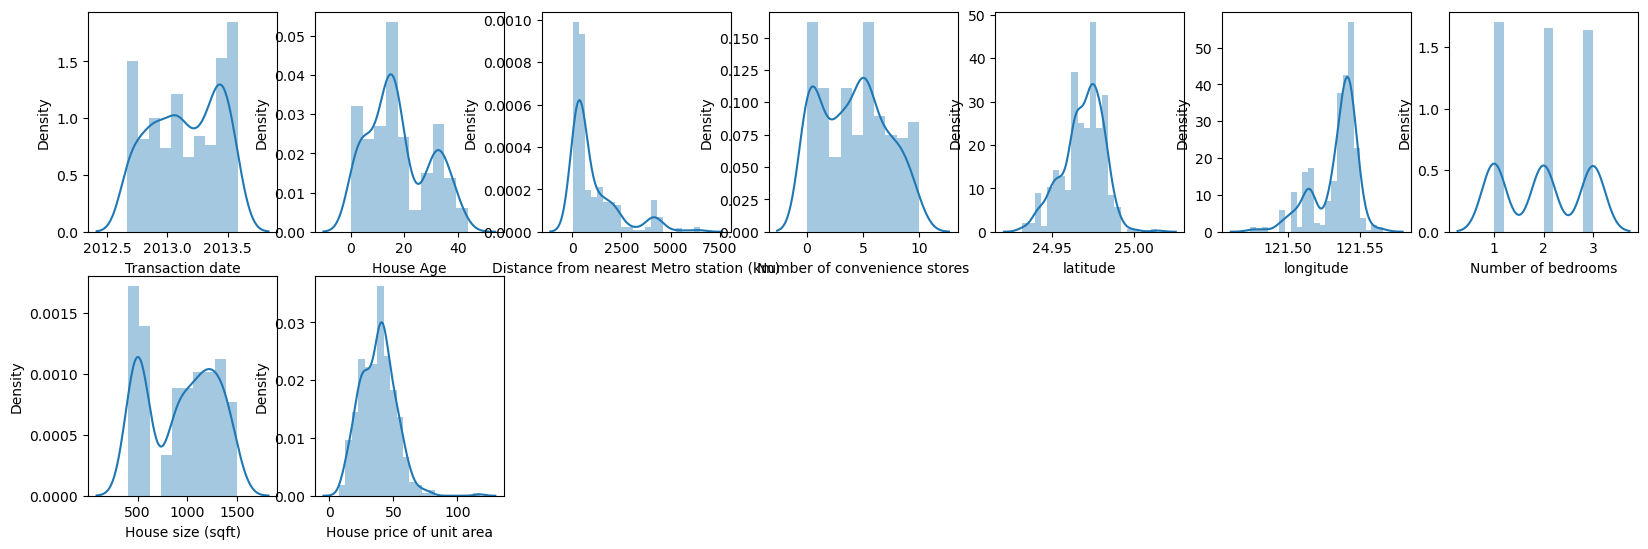

In [8]:
count=1
plt.subplots(figsize=(20,20))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df[i],bins='auto')
        count+=1

plt.show()


#Displot for all the variables.

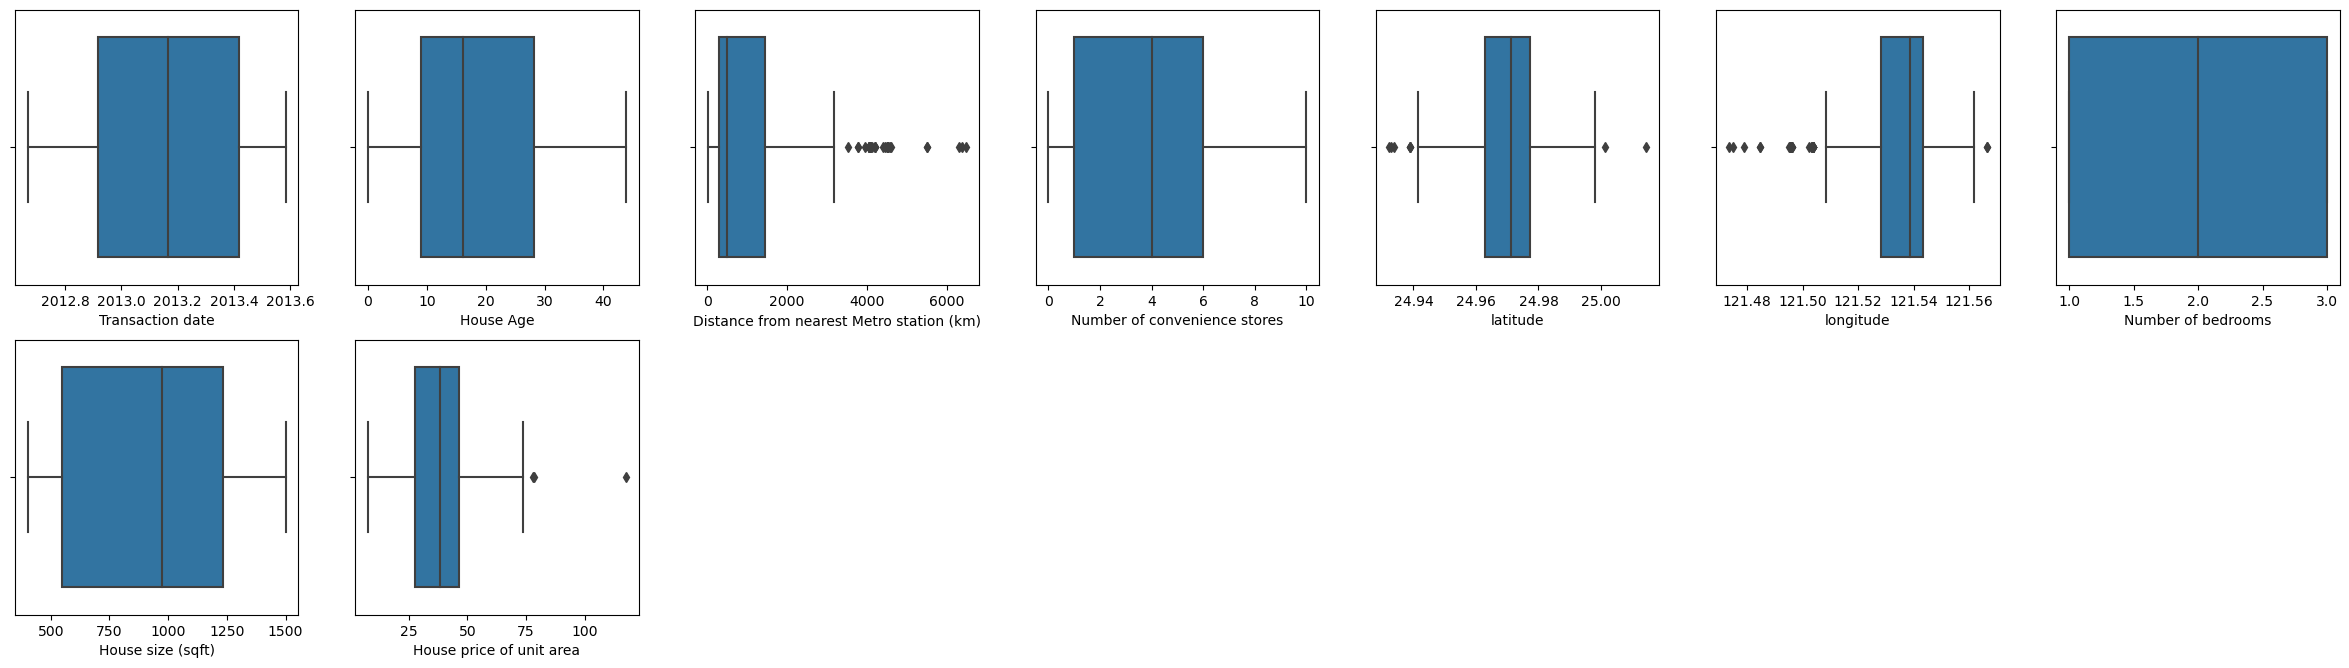

In [9]:
count=1
plt.subplots(figsize=(30,25))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.boxplot(df[i])
        count+=1

plt.show()


#Boxplot for all the variables.

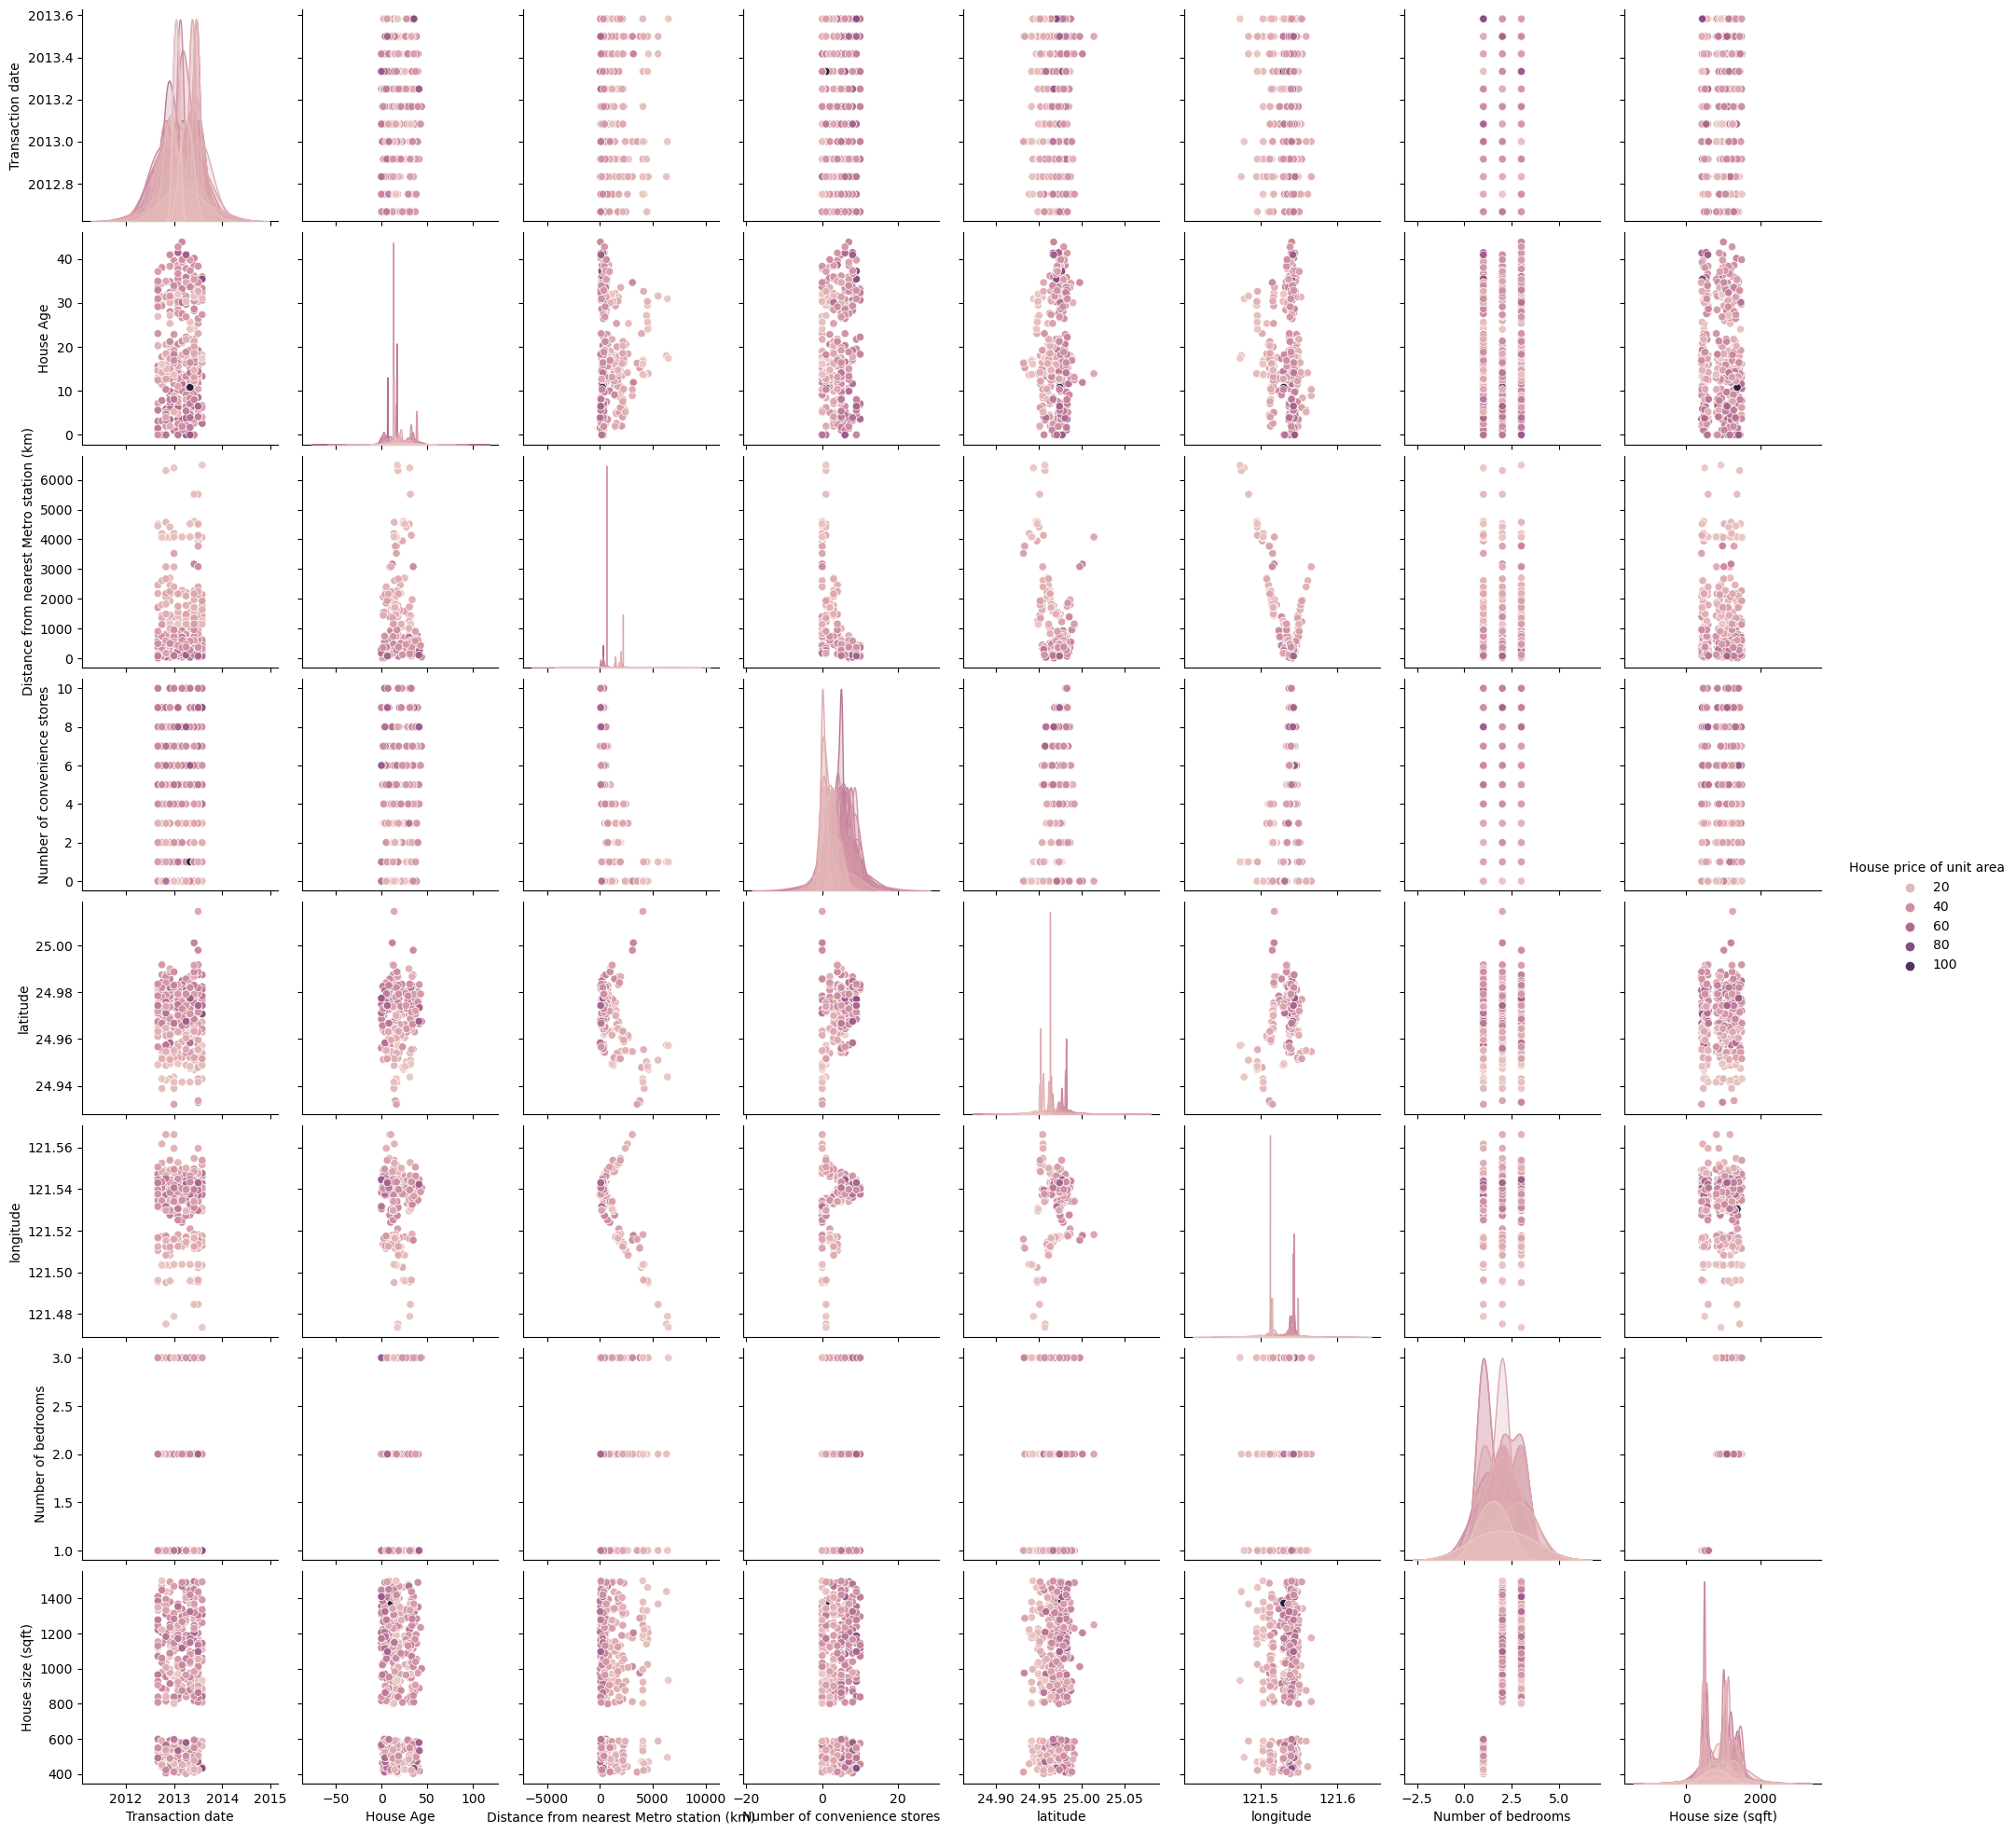

In [10]:
sns.pairplot(df,hue='House price of unit area')

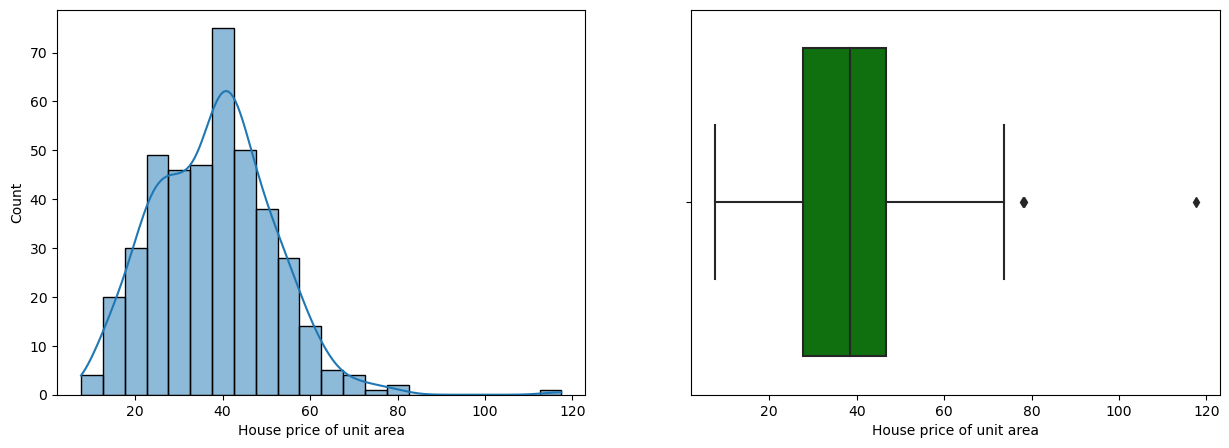

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['House price of unit area'],bins='auto',kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['House price of unit area'],orient='vertical',color='green');

#Histplot of Dependent Variable (House price of unit area)

In [12]:
corr=df.corr()
# This is Correlation(shows What variable is related to what variable.)

<AxesSubplot:>

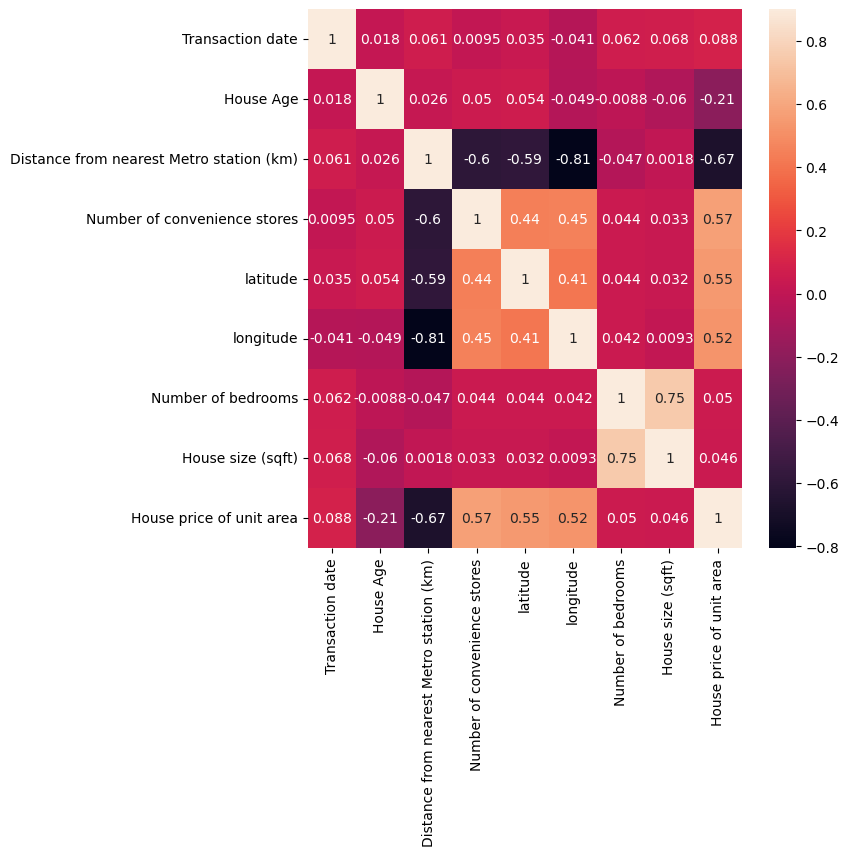

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,vmax=0.9)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

In [15]:
X=df.drop('House price of unit area',axis=1)
y=df['House price of unit area']

#Seperate of dependent and Independent Variable 

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)

 X_train dataset:  (289, 8)
 y_train dataset:  (289,)
 X_test dataset:  (125, 8)
 y_test dataset:  (125,)


In [18]:
X_test

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
388,2013.500000,10.4,2251.9380,4,24.95957,121.51353,1,505
102,2013.083333,1.1,193.5845,6,24.96571,121.54089,3,1028
187,2013.000000,8.9,3078.1760,0,24.95464,121.56627,3,1175
162,2012.750000,16.0,4066.5870,0,24.94297,121.50342,1,469
90,2012.833333,0.0,274.0144,1,24.97480,121.53059,2,954
...,...,...,...,...,...,...,...,...
323,2013.416667,28.6,197.1338,6,24.97631,121.54436,1,594
73,2013.166667,13.8,4082.0150,0,24.94155,121.50381,3,1176
238,2013.083333,12.8,732.8528,0,24.97668,121.52518,3,1244
273,2013.416667,13.2,170.1289,1,24.97371,121.52984,2,1299


In [19]:
y_test

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
       ... 
323    42.5
73     20.0
238    40.6
273    29.3
364    33.1
Name: House price of unit area, Length: 125, dtype: float64

In [20]:
from scipy.stats import zscore
XScaled=X.apply(zscore)

#Scaling of Data For better Result 

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy on Training data:',model.score(X_train, y_train) )  
print('Accuracy on Test data:',model.score(X_test, y_test) )

Accuracy on Training data: 0.6094385654772806
Accuracy on Test data: 0.5055850801458905


In [22]:
from sklearn.metrics import mean_absolute_error

print('MAE =' , mean_absolute_error(y_test,y_pred))

MAE = 6.716022915352099


In [23]:
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE =' , mean_absolute_percentage_error(y_test,y_pred))

MAPE = 0.19088857575959695


In [24]:
from sklearn.metrics import mean_squared_error

print('MSE =' , mean_squared_error(y_test,y_pred))

MSE = 113.92553813078639


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE=',np.sqrt (mean_squared_error(y_test,y_pred)))

RMSE= 10.67359068593069


In [26]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_tree = rf.predict(X_test)

print('Accuracy on Training data:',rf.score(X_train, y_train) )  
print('Accuracy on Test data:',rf.score(X_test, y_test) )

Accuracy on Training data: 0.963025288801575
Accuracy on Test data: 0.6348156227519797


## Conclusion 

1. As We would prefer to choose Logistic regression over all other model .
2. Overlifting is less in Linear Model.
3. random forest has more Overfitting 